# Pandas Intro, Part 2
* Formatting data
* Profiling data continued
    * Missing data
    * Unique values and counts
    * De-duplicating
* Clean missing data
* Group By operations and reshaping data
* Combining data and merging (joining) data
* Rolling / window functions and lead/lag shift
* Custom functions - apply/applymap


Resources:
* https://pandas.pydata.org/docs/user_guide/index.html
* https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html
* https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428
* https://tomaugspurger.github.io/modern-1-intro.html

In [1]:
import os
import shutil
import pandas as pd
import seaborn as sns

# custom module for this tutorial
import utils


# these are display options for pandas in jupyter
# Jupyter likes to hide rows/columns by default when presenting many at once
pd.set_option('max_columns', 1000)   # show all columns
pd.set_option('max_rows', 1000)      # show all rows
pd.set_option('max_colwidth', None)  # don't truncate column width and show full text values

In [2]:
# remove ./data/* data sets if they exist, so we can replace
for f in os.listdir(r'./data'):
    fpath = os.path.join(r'./data', f)
    if os.path.isfile(fpath):
        os.remove(fpath)
    else:
        shutil.rmtree(os.path.join(r'./data', f))

In [3]:
# downloading searborn datasets
utils.prep_example_data()

Getting CSV files from seaborn in ./data/ directory


C:\Users\pzuradzki\AppData\Local\Continuum\miniconda3\envs\dev\lib\site-packages\seaborn\utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\pzuradzki\AppData\Local\Continuum\miniconda3\envs\dev\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


./data/anscombe.csv
./data/attention.csv
./data/brain_networks.csv
./data/car_crashes.csv
./data/diamonds.csv
./data/dots.csv
./data/exercise.csv
./data/flights.csv
./data/fmri.csv
./data/gammas.csv
./data/geyser.csv
./data/iris.csv
./data/mpg.csv
./data/penguins.csv
./data/planets.csv
./data/tips.csv
./data/titanic.csv


In [4]:
# this may take 1-2 minutes. Downloading 4 CSV files.
# downloading trip history data from Divvy bikeshare
# docs: https://www.divvybikes.com/system-data

divvy_urls = ['https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2019_Q1.zip',
       'https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2019_Q2.zip',
       'https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2019_Q3.zip',
       'https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2019_Q4.zip']

for url in divvy_urls:
    utils.process_url_zip(url=url, zip_name='divvy.zip', target_path='./data')
    print('')

Downloading...
https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2019_Q1.zip
Extracting...
Contents Divvy_Trips_2019_Q1 
extracted at: ./data.
Removing divvy.zip.
Renaming to csv

Downloading...
https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2019_Q2.zip
Extracting...
Contents Divvy_Trips_2019_Q2 
extracted at: ./data.
Removing divvy.zip.
Renaming to csv

Downloading...
https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2019_Q3.zip
Extracting...
Contents Divvy_Trips_2019_Q3.csv 
extracted at: ./data.
Removing divvy.zip.

Downloading...
https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2019_Q4.zip
Extracting...
Contents Divvy_Trips_2019_Q4.csv 
extracted at: ./data.
Removing divvy.zip.



In [5]:
# check that data files are there

os.listdir('./data')

['anscombe.csv',
 'attention.csv',
 'brain_networks.csv',
 'car_crashes.csv',
 'diamonds.csv',
 'Divvy_Trips_2019_Q1.csv',
 'Divvy_Trips_2019_Q2.csv',
 'Divvy_Trips_2019_Q3.csv',
 'Divvy_Trips_2019_Q4.csv',
 'dots.csv',
 'exercise.csv',
 'flights.csv',
 'fmri.csv',
 'gammas.csv',
 'geyser.csv',
 'iris.csv',
 'mpg.csv',
 'penguins.csv',
 'planets.csv',
 'tips.csv',
 'titanic.csv',
 '__MACOSX']

# Prep - load and profile data set

In [6]:
divvy = pd.read_csv('./data/Divvy_Trips_2019_Q1.csv')

# dtypes = {'birthyear': 'str', 'from_station_name': 'category'}
# divvy = pd.read_csv('./data/Divvy_Trips_2019_Q1.csv', dtype=dtypes)

In [7]:
# inspect top 5 rows
divvy.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [8]:
divvy.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [9]:
divvy.shape

(365069, 12)

In [10]:
# check size and object types
divvy.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   start_time         365069 non-null  object 
 2   end_time           365069 non-null  object 
 3   bikeid             365069 non-null  int64  
 4   tripduration       365069 non-null  object 
 5   from_station_id    365069 non-null  int64  
 6   from_station_name  365069 non-null  object 
 7   to_station_id      365069 non-null  int64  
 8   to_station_name    365069 non-null  object 
 9   usertype           365069 non-null  object 
 10  gender             345358 non-null  object 
 11  birthyear          347046 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 189.0 MB


In [11]:
# get top 10 birthyears and check NAs
# pd.NaN is numpy object for null values
divvy['birthyear'].value_counts(dropna=False).head(10)

1989.0    21014
1992.0    18924
NaN       18023
1990.0    17410
1987.0    17155
1991.0    16146
1988.0    14588
1993.0    14197
1985.0    13411
1986.0    13210
Name: birthyear, dtype: int64

# Formatting data

In [12]:
divvy['gender'].head()

0      Male
1    Female
2    Female
3      Male
4      Male
Name: gender, dtype: object

### Mapping values with map()

In [13]:
divvy.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [14]:
# map words to abbreviation

gender_map = {'Male': 'M', 'Female': 'F'}
# divvy['gender2'] = divvy['gender'].map(gender_map)
divvy['gender2'] = divvy['gender'].map({'Male': 'M', 'Female': 'F'})

divvy.head(3)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,gender2
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,M
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,F
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,F


### Converting data types with `.astype(<type>)`

This throws an error...

`divvy['birthyear2'] = divvy['birthyear'].astype(int)`

```
ValueError                                Traceback (most recent call last)
<ipython-input-27-3b2a21753e03> in <module>
----> 1 divvy['birthyear2'] = divvy['birthyear'].astype(int)
...
ValueError: Cannot convert non-finite values (NA or inf) to integer
```

In [15]:
# fill nulls with 0, then convert to int
    # we'll cover fillna() and dropna() later
    
divvy['birthyear2'] = divvy['birthyear'].fillna(0).astype(float)
divvy.head(3)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,gender2,birthyear2
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,M,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,F,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,F,1994.0


## String operations

### Extract street names

In [16]:
# we will parse the station names
divvy['from_station_name'].head()

0                 Wabash Ave & Grand Ave
1                 State St & Randolph St
2                   Racine Ave & 18th St
3         California Ave & Milwaukee Ave
4    Mies van der Rohe Way & Chicago Ave
Name: from_station_name, dtype: object

In [17]:
# for pandas, remember to access .str attribute to make string methods available
    # else you will get this error --> `AttributeError: 'Series' object has no attribute 'split'`

divvy['from_station_name'].str.split(' & ').head()

0                 [Wabash Ave, Grand Ave]
1                 [State St, Randolph St]
2                   [Racine Ave, 18th St]
3         [California Ave, Milwaukee Ave]
4    [Mies van der Rohe Way, Chicago Ave]
Name: from_station_name, dtype: object

In [18]:
divvy['from_station_name'].str.split(' & ', expand=True).head()

,0,1
0,Wabash Ave,Grand Ave
1,State St,Randolph St
2,Racine Ave,18th St
3,California Ave,Milwaukee Ave
4,Mies van der Rohe Way,Chicago Ave


In [19]:
divvy[['from_x', 'from_y']] = divvy['from_station_name'].str.split(' & ', expand=True)
divvy[['from_x', 'from_y']].head()

,from_x,from_y
0,Wabash Ave,Grand Ave
1,State St,Randolph St
2,Racine Ave,18th St
3,California Ave,Milwaukee Ave
4,Mies van der Rohe Way,Chicago Ave


### String search and regex pattern matching

In [20]:
s = 'Fort Dearborn Dr & 31st St'

'Dearborn' in s

True

In [21]:
# search_bool is a Series of True/False's
# pass to bracket [] of dataframe for boolean indexing/filtering

# filter to where station contains Dearborn in name
search_bool = divvy['from_station_name'].str.contains('Dearborn')
divvy[search_bool].head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,gender2,birthyear2,from_x,from_y
8,21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995.0,M,1995.0,Fort Dearborn Dr,31st St
109,21742559,2019-01-01 02:31:26,2019-01-01 02:42:48,2437,682.0,49,Dearborn St & Monroe St,74,Kingsbury St & Erie St,Subscriber,Male,1962.0,M,1962.0,Dearborn St,Monroe St
162,21742614,2019-01-01 06:09:14,2019-01-01 06:12:33,4521,199.0,49,Dearborn St & Monroe St,191,Canal St & Monroe St (*),Subscriber,Male,1993.0,M,1993.0,Dearborn St,Monroe St
208,21742662,2019-01-01 08:33:27,2019-01-01 08:38:18,5853,291.0,140,Dearborn Pkwy & Delaware Pl,31,Franklin St & Chicago Ave,Subscriber,Male,1986.0,M,1986.0,Dearborn Pkwy,Delaware Pl
221,21742675,2019-01-01 08:55:47,2019-01-01 09:01:28,5244,341.0,110,Dearborn St & Erie St,133,Kingsbury St & Kinzie St,Subscriber,Male,1973.0,M,1973.0,Dearborn St,Erie St


In [22]:
# use of not (~) operator
no_and_character_bool = ~(divvy['from_station_name'].str.contains('&'))
divvy[no_and_character_bool].loc[:, 'from_station_name'].head()

12        Millennium Park
13        Millennium Park
68           Eckhart Park
139    Daley Center Plaza
163       Kosciuszko Park
Name: from_station_name, dtype: object

In [23]:
# use regex search via Series.str.contains(<pattern>, regex=True)

regex_bool = divvy['from_station_name'].str.contains('Pkwy|Pl', regex=True)
divvy[regex_bool].head(3)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,gender2,birthyear2,from_x,from_y
16,21742459,2019-01-01 00:24:13,2019-01-01 00:31:00,3373,407.0,152,Lincoln Ave & Diversey Pkwy,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1967.0,M,1967.0,Lincoln Ave,Diversey Pkwy
24,21742468,2019-01-01 00:33:09,2019-01-01 00:50:25,2630,"1,036.0",13,Wilton Ave & Diversey Pkwy,61,Wood St & Milwaukee Ave,Subscriber,Male,1991.0,M,1991.0,Wilton Ave,Diversey Pkwy
44,21742490,2019-01-01 01:04:29,2019-01-01 01:10:52,1998,383.0,313,Lakeview Ave & Fullerton Pkwy,127,Lincoln Ave & Fullerton Ave,Subscriber,Female,1993.0,F,1993.0,Lakeview Ave,Fullerton Pkwy


### Convert continous variables to categories (binning data)

If you want equal distribution of the items in your bins, use `qcut` . If you want to define your own numeric bin ranges, then use `cut`.

In [24]:
# create age column
    # more on date formatting later

from datetime import datetime

current_year = datetime.now().year
print(f'current year is: {current_year}')

divvy['age'] = current_year - divvy['birthyear']
divvy[['birthyear', 'age']].head()

current year is: 2020


,birthyear,age
0,1989.0,31.0
1,1990.0,30.0
2,1994.0,26.0
3,1993.0,27.0
4,1994.0,26.0


In [25]:
divvy['age'].describe()

count    347046.000000
mean         38.325703
std          11.245683
min          17.000000
25%          30.000000
50%          35.000000
75%          45.000000
max         120.000000
Name: age, dtype: float64

In [26]:
# cut into 4 intervales of equal size

divvy['age_interval'] = pd.qcut(divvy['age'], q=4)
divvy['age_interval'].value_counts(dropna=False, normalize=True)

(16.999, 30.0]    0.269785
(35.0, 45.0]      0.234405
(45.0, 120.0]     0.229009
(30.0, 35.0]      0.217433
NaN               0.049369
Name: age_interval, dtype: float64

In [27]:
divvy[['age', 'age_interval']].head()

,age,age_interval
0,31.0,"(30.0, 35.0]"
1,30.0,"(16.999, 30.0]"
2,26.0,"(16.999, 30.0]"
3,27.0,"(16.999, 30.0]"
4,26.0,"(16.999, 30.0]"


In [28]:
# cutting into quintiles
bin_labels = ['bottom third', 'middle third', 'upper third'] 
divvy['age_interval2'] = pd.qcut(divvy['age'], q=[0, .33, .66, 1], labels=bin_labels)

In [29]:
# sample random 10
divvy[['age', 'age_interval2']].sample(10)

,age,age_interval2
159311,50.0,upper third
246931,32.0,middle third
208959,63.0,upper third
24547,29.0,bottom third
12270,27.0,bottom third
95500,29.0,bottom third
313954,48.0,upper third
344570,NaN,NaN
56964,30.0,bottom third
327025,31.0,bottom third


In [30]:
# intervals of eqaul size intervals -- but un-equal distributions

pd.cut(divvy['age'], bins=4).value_counts(dropna=False, normalize=True)

(16.897, 42.75]    0.670662
(42.75, 68.5]      0.271686
NaN                0.049369
(68.5, 94.25]      0.007815
(94.25, 120.0]     0.000468
Name: age, dtype: float64

### Converting datetimes

Notes
* pandas/numpy datetime64 data type is more efficient than native Python datetime vie `datetime` standard library
* try to convert to pandas datetime64 if you're doing computations on many dates (ex: dates in a dataset)
* docs: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [31]:
divvy['start_time'] = pd.to_datetime(divvy['start_time'])

In [32]:
divvy.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time                     object
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
gender2                      object
birthyear2                  float64
from_x                       object
from_y                       object
age                         float64
age_interval               category
age_interval2              category
dtype: object

In [33]:
# now, using `.dt.` attribute, we can access datetime-like attributes too

divvy['start_day'] = divvy['start_time'].dt.day
divvy['start_month'] = divvy['start_time'].dt.month
divvy['start_hour'] = divvy['start_time'].dt.hour

divvy[['start_time', 'start_day', 'start_month', 'start_hour']].head()

,start_time,start_day,start_month,start_hour
0,2019-01-01 00:04:37,1,1,0
1,2019-01-01 00:08:13,1,1,0
2,2019-01-01 00:13:23,1,1,0
3,2019-01-01 00:13:45,1,1,0
4,2019-01-01 00:14:52,1,1,0


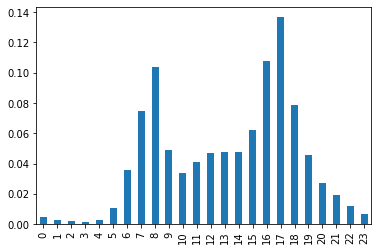

In [34]:
# now we can plot frequency by hour

divvy['start_hour'].value_counts(normalize=True)\
                   .sort_index()\
                   .plot(kind='bar')

# Calculated fields

In [35]:
# tripduration is a string... to do math, we want it to be a float or int

divvy['tripduration'].head()

0      390.0
1      441.0
2      829.0
3    1,783.0
4      364.0
Name: tripduration, dtype: object

In [36]:
# convert string to float: replace commas, replace '.0', then cast to float
# the \ backslash allows continuing a statement on a new line
# combining multiple operations on Series (1d array) like this is also known as method chaining
divvy['tripduration'] = divvy['tripduration'].str.replace(',', '')\
                                             .str.replace('.0','')\
                                             .replace('','0')\
                                             .astype(int)

# make new tripduration field that converts minutes to hours
divvy['tripduration_hrs'] = divvy['tripduration'] / 60

In [37]:
divvy[['tripduration', 'tripduration_hrs']].head()

,tripduration,tripduration_hrs
0,3,0.050000
1,441,7.350000
2,829,13.816667
3,1783,29.716667
4,364,6.066667


# Profiling data

In [38]:
# .describe() can be used on sub-selection
# .T for transpose
# df.describe() looks at only numeric columns by default'; include='all' will include categorical and string values

divvy[['gender', 'age']].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,345358,2,Male,278440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,347046,NaN,NaN,NaN,38.3257,11.2457,17,30,35,45,120


In [39]:
# or you can use df.describe() on the entire dataframe
divvy.describe(include='all')

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,gender2,birthyear2,from_x,from_y,age,age_interval,age_interval2,start_day,start_month,start_hour,tripduration_hrs
count,3.650690e+05,365069,365069,365069.000000,365069.000000,365069.000000,365069,365069.000000,365069,365069,345358,347046.000000,345358,365069.000000,365069,351694,347046.000000,347046,347046,365069.000000,365069.000000,365069.000000,365069.000000
unique,NaN,343022,338367,NaN,NaN,NaN,594,NaN,600,2,2,NaN,2,NaN,220,241,NaN,4,3,NaN,NaN,NaN,NaN
top,NaN,2019-03-27 17:27:33,2019-01-04 10:00:09,NaN,NaN,NaN,Clinton St & Washington Blvd,NaN,Clinton St & Washington Blvd,Subscriber,Male,NaN,M,NaN,Clinton St,Madison St,NaN,"(16.999, 30.0]",bottom third,NaN,NaN,NaN,NaN
freq,NaN,6,8,NaN,NaN,NaN,7699,NaN,7699,341906,278440,NaN,278440,NaN,22154,14523,NaN,98490,119504,NaN,NaN,NaN,NaN
first,NaN,2019-01-01 00:04:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-03-31 23:53:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.196087e+07,NaN,NaN,3429.484607,635.502064,198.088816,NaN,198.581123,NaN,NaN,NaN,1981.674297,NaN,1883.841515,NaN,NaN,38.325703,NaN,NaN,15.395629,2.170760,13.343951,10.591701
std,1.271750e+05,NaN,NaN,1923.321025,4781.062758,153.493553,NaN,154.468304,NaN,NaN,NaN,11.245683,NaN,429.444039,NaN,NaN,11.245683,NaN,NaN,8.318831,0.841053,4.686117,79.684379
min,2.174244e+07,NaN,NaN,1.000000,0.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,1900.000000,NaN,0.000000,NaN,NaN,17.000000,NaN,NaN,1.000000,1.000000,0.000000,0.000000
25%,2.184876e+07,NaN,NaN,1777.000000,159.000000,76.000000,NaN,76.000000,NaN,NaN,NaN,1975.000000,NaN,1972.000000,NaN,NaN,30.000000,NaN,NaN,8.000000,1.000000,9.000000,2.650000


In [40]:
# unique values via drop_duplicates or numpy .unique()

divvy[['from_station_name']].drop_duplicates()
# divvy['from_station_name'].unique()

,from_station_name
0,Wabash Ave & Grand Ave
1,State St & Randolph St
2,Racine Ave & 18th St
3,California Ave & Milwaukee Ave
4,Mies van der Rohe Way & Chicago Ave
5,LaSalle St & Washington St
7,St. Clair St & Erie St
8,Fort Dearborn Dr & 31st St
9,Lake Shore Dr & North Blvd
10,Halsted St & Roscoe St


In [41]:
# number of unique values

divvy['from_station_name'].nunique()
# divvy['from_station_name'].drop_duplicates().shape[0]

594

### De-duplication

In [42]:
names = pd.DataFrame([['John', 'Doe', '123 Main St'],
                     ['John', 'Doe', '999 Wall St'],
                     ['John', 'Doe', '123 Main St'],
                     ['Jane', 'Dee', '1 Pennsylvania'],
                     ['Jane', 'Dee', 'Dearborn / Erie'],
                     ['Mike', 'Jones', 'Palmer House']], columns=['first', 'last', 'address'])

names

,first,last,address
0,John,Doe,123 Main St
1,John,Doe,999 Wall St
2,John,Doe,123 Main St
3,Jane,Dee,1 Pennsylvania
4,Jane,Dee,Dearborn / Erie
5,Mike,Jones,Palmer House


In [43]:
# dedupe at level of first-last name
# arbitrarily keep first address (can sort if applicable)

deduped_names = names.drop_duplicates(subset=['first', 'last'], keep='first')
deduped_names

,first,last,address
0,John,Doe,123 Main St
3,Jane,Dee,1 Pennsylvania
5,Mike,Jones,Palmer House


### Identifying duplicates

In [44]:
names

,first,last,address
0,John,Doe,123 Main St
1,John,Doe,999 Wall St
2,John,Doe,123 Main St
3,Jane,Dee,1 Pennsylvania
4,Jane,Dee,Dearborn / Erie
5,Mike,Jones,Palmer House


In [45]:
# dupes across all columns
# John Doe @ 123 Main St exists twice in original
    # Jane Dee exists twice but at different addresses

names[names.duplicated()]

,first,last,address
2,John,Doe,123 Main St


In [46]:
# dupes across subset of columns

dupes = names[names.duplicated(subset=['first', 'last'])]
dupes

,first,last,address
1,John,Doe,999 Wall St
2,John,Doe,123 Main St
4,Jane,Dee,Dearborn / Erie


In [47]:
# unique list of first-last names that are duplicated

names.iloc[dupes.index].loc[:,['first', 'last']].drop_duplicates()

,first,last
1,John,Doe
4,Jane,Dee


# Missing data

In [48]:
# counting missing values
    # isna() returns a Series of bools (True/False)
    # True=1 and False=0, so summing up the True's is like counting where True
divvy['birthyear'].isna().sum()

18023

In [49]:
# inspecting entire record (all columns) for rows with missing values for birthyear
# show all columns of records where 
divvy[divvy['birthyear'].isna()].head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,gender2,birthyear2,from_x,from_y,age,age_interval,age_interval2,start_day,start_month,start_hour,tripduration_hrs
19,21742463,2019-01-01 00:29:19,2019-01-01 01:08:12,3914,2333,35,Streeter Dr & Grand Ave,39,Wabash Ave & Adams St,Customer,NaN,NaN,NaN,0.0,Streeter Dr,Grand Ave,NaN,NaN,NaN,1,1,0,38.883333
21,21742465,2019-01-01 00:29:28,2019-01-01 01:07:49,3355,21,35,Streeter Dr & Grand Ave,39,Wabash Ave & Adams St,Customer,NaN,NaN,NaN,0.0,Streeter Dr,Grand Ave,NaN,NaN,NaN,1,1,0,0.350000
48,21742494,2019-01-01 01:10:48,2019-01-01 01:32:28,2517,10,290,Kedzie Ave & Palmer Ct,476,Kedzie Ave & Leland Ave,Customer,NaN,NaN,NaN,0.0,Kedzie Ave,Palmer Ct,NaN,NaN,NaN,1,1,1,0.166667
52,21742498,2019-01-01 01:17:23,2019-01-01 01:33:30,374,967,367,Racine Ave & 35th St,9,Leavitt St & Archer Ave,Customer,NaN,NaN,NaN,0.0,Racine Ave,35th St,NaN,NaN,NaN,1,1,1,16.116667
53,21742499,2019-01-01 01:17:33,2019-01-01 01:33:51,1776,978,367,Racine Ave & 35th St,9,Leavitt St & Archer Ave,Customer,NaN,NaN,NaN,0.0,Racine Ave,35th St,NaN,NaN,NaN,1,1,1,16.300000


In [50]:
# 'how' argument can be: 'any' (default) or 'all' 

# returns a new dataframe (*not* an in-place modification)
# re-assign to a new dataframe if you'd like to work off the copy with dropped NAs
divvy.dropna(subset=['birthyear']).head()

# divvy.dropna(how='all')

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,gender2,birthyear2,from_x,from_y,age,age_interval,age_interval2,start_day,start_month,start_hour,tripduration_hrs
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,3,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,M,1989.0,Wabash Ave,Grand Ave,31.0,"(30.0, 35.0]",bottom third,1,1,0,0.050000
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,F,1990.0,State St,Randolph St,30.0,"(16.999, 30.0]",bottom third,1,1,0,7.350000
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,F,1994.0,Racine Ave,18th St,26.0,"(16.999, 30.0]",bottom third,1,1,0,13.816667
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,M,1993.0,California Ave,Milwaukee Ave,27.0,"(16.999, 30.0]",bottom third,1,1,0,29.716667
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,M,1994.0,Mies van der Rohe Way,Chicago Ave,26.0,"(16.999, 30.0]",bottom third,1,1,0,6.066667


In [51]:
# caution: value_counts drops NAs by default

divvy['birthyear'].value_counts(dropna=False).head(20)

1989.0    21014
1992.0    18924
NaN       18023
1990.0    17410
1987.0    17155
1991.0    16146
1988.0    14588
1993.0    14197
1985.0    13411
1986.0    13210
1984.0    12835
1994.0    11450
1982.0    10641
1983.0    10559
1981.0     9733
1980.0     9247
1995.0     8559
1977.0     8116
1979.0     7432
1978.0     6523
Name: birthyear, dtype: int64

# Group By operations and reshaping data
* df.groupby()
* df.pivot_table()
* df.melt()
* pd.crosstab()
* df.T

* note: caution on NAs. Fill NAs in grouping columns prior to grouping.

### General-purpose pandas groupby syntax
### ```df.groupby('grouping column').agg({'aggregating column': 'aggregating function'})```

In [52]:
divvy.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,gender2,birthyear2,from_x,from_y,age,age_interval,age_interval2,start_day,start_month,start_hour,tripduration_hrs
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,3,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,M,1989.0,Wabash Ave,Grand Ave,31.0,"(30.0, 35.0]",bottom third,1,1,0,0.050000
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,F,1990.0,State St,Randolph St,30.0,"(16.999, 30.0]",bottom third,1,1,0,7.350000
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,F,1994.0,Racine Ave,18th St,26.0,"(16.999, 30.0]",bottom third,1,1,0,13.816667
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,M,1993.0,California Ave,Milwaukee Ave,27.0,"(16.999, 30.0]",bottom third,1,1,0,29.716667
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,M,1994.0,Mies van der Rohe Way,Chicago Ave,26.0,"(16.999, 30.0]",bottom third,1,1,0,6.066667


In [53]:
# average and total tripduration by month; average age by month
grouped1 = divvy.groupby(['start_month']).agg({'tripduration': ['mean', 'sum'], 'age': ['mean', 'std']})
grouped1

tripduration                   age           
                    mean        sum       mean        std
start_month                                              
1             658.967155   68052856  38.598131  11.192001
2             585.975048   56362596  38.667695  11.380527
3             649.634692  107586651  37.939037  11.185243

In [54]:
# you can add multiple grouping columns too
grouped2 = divvy.groupby(['gender', 'age_interval']).agg({'tripduration': ['mean', 'sum']})
grouped2

tripduration          
                              mean       sum
gender age_interval                         
Female (16.999, 30.0]   633.855786  14614179
       (30.0, 35.0]     645.196335   9858600
       (35.0, 45.0]     615.297048   9190692
       (45.0, 120.0]    676.108538   9225501
Male   (16.999, 30.0]   622.984359  46839079
       (30.0, 35.0]     547.926914  34965956
       (35.0, 45.0]     519.775107  36415444
       (45.0, 120.0]    525.580031  36464217

In [55]:
# pandas creates something called a multi-index (grouped logical key) by default
# we often don't want this, so use reset_index() to convert the grouping columns from indexes to normal columns
grouped3 = grouped2.reset_index()
grouped3

gender    age_interval tripduration          
                                  mean       sum
0  Female  (16.999, 30.0]   633.855786  14614179
1  Female    (30.0, 35.0]   645.196335   9858600
2  Female    (35.0, 45.0]   615.297048   9190692
3  Female   (45.0, 120.0]   676.108538   9225501
4    Male  (16.999, 30.0]   622.984359  46839079
5    Male    (30.0, 35.0]   547.926914  34965956
6    Male    (35.0, 45.0]   519.775107  36415444
7    Male   (45.0, 120.0]   525.580031  36464217

### Groupby "Named Aggregations" - custom field names

In [56]:
# if indexing is causing issues, an alternate groupby syntax lets you control the naming of the columns
# try commenting and un-commenting the 'reset_index()' to see what happesn

divvy.groupby(['gender', 'age_interval']).agg(trip_dur_mean=('tripduration', 'mean'),
                                               trip_dur_sum=('tripduration', 'sum'))\
                                         .reset_index()

,gender,age_interval,trip_dur_mean,trip_dur_sum
0,Female,"(16.999, 30.0]",633.855786,14614179
1,Female,"(30.0, 35.0]",645.196335,9858600
2,Female,"(35.0, 45.0]",615.297048,9190692
3,Female,"(45.0, 120.0]",676.108538,9225501
4,Male,"(16.999, 30.0]",622.984359,46839079
5,Male,"(30.0, 35.0]",547.926914,34965956
6,Male,"(35.0, 45.0]",519.775107,36415444
7,Male,"(45.0, 120.0]",525.580031,36464217


In [57]:
# use group_object.size() for counts
# ex: # of trips per month
divvy.groupby(['start_month']).size()

start_month
1    103272
2     96186
3    165611
dtype: int64

### Pivoting/re-shaping from skinny to wide layout

Groupby is usually in a skinny/tidy format. Sometimes you want to 

In [58]:
grouped = divvy.groupby(['gender', 'age_interval']).agg(trip_dur_mean=('tripduration', 'mean'),
                                               trip_dur_sum=('tripduration', 'sum'))\
                                         .reset_index()

grouped

,gender,age_interval,trip_dur_mean,trip_dur_sum
0,Female,"(16.999, 30.0]",633.855786,14614179
1,Female,"(30.0, 35.0]",645.196335,9858600
2,Female,"(35.0, 45.0]",615.297048,9190692
3,Female,"(45.0, 120.0]",676.108538,9225501
4,Male,"(16.999, 30.0]",622.984359,46839079
5,Male,"(30.0, 35.0]",547.926914,34965956
6,Male,"(35.0, 45.0]",519.775107,36415444
7,Male,"(45.0, 120.0]",525.580031,36464217


In [59]:
grouped_df = divvy.groupby(['gender', 'age_interval']).agg(trip_dur_mean=('tripduration', 'mean'),
                                               trip_dur_sum=('tripduration', 'sum'))

In [60]:
# average trip duration by age (rows) and gender (columns)
pivoted = divvy.pivot_table(index=['age_interval'], columns=['gender'], values=['tripduration'], aggfunc=['mean'])['mean']
pivoted

tripduration            
gender               Female        Male
age_interval                           
(16.999, 30.0]   633.855786  622.984359
(30.0, 35.0]     645.196335  547.926914
(35.0, 45.0]     615.297048  519.775107
(45.0, 120.0]    676.108538  525.580031

In [61]:
# manipulating index and axis name to remove multi-index and get clean dataframe
pivoted = pivoted['tripduration'].reset_index()
pivoted = pivoted.rename_axis(None, axis='columns').reset_index(drop=True)
pivoted

,age_interval,Female,Male
0,"(16.999, 30.0]",633.855786,622.984359
1,"(30.0, 35.0]",645.196335,547.926914
2,"(35.0, 45.0]",615.297048,519.775107
3,"(45.0, 120.0]",676.108538,525.580031


### "Melting"/un-pivot from wide to skinny

In [62]:
melted = pivoted.melt(id_vars=['age_interval'], value_vars=['Female', 'Male'], 
                      var_name='gender', value_name='mean_trip_dur')
melted

,age_interval,gender,mean_trip_dur
0,"(16.999, 30.0]",Female,633.855786
1,"(30.0, 35.0]",Female,645.196335
2,"(35.0, 45.0]",Female,615.297048
3,"(45.0, 120.0]",Female,676.108538
4,"(16.999, 30.0]",Male,622.984359
5,"(30.0, 35.0]",Male,547.926914
6,"(35.0, 45.0]",Male,519.775107
7,"(45.0, 120.0]",Male,525.580031


# Combining data and merging (joining) data
* pd.concat()
* df.merge()

In [63]:
divvy_q3 = pd.read_csv('./data/Divvy_Trips_2019_Q3.csv')
divvy_q4 = pd.read_csv('./data/Divvy_Trips_2019_Q4.csv')

combined_df = pd.concat([divvy_q3, divvy_q4])

# re-create start_month varibale by converting start_time string to date, then get the month attribute 
combined_df['start_month'] = pd.to_datetime(combined_df['start_time']).dt.month

# check that we have all months in combined dataframe (q3-q4; months 7-12)
combined_df.groupby(['start_month']).size()

start_month
7     557315
8     590184
9     493219
10    371786
11    177176
12    155092
dtype: int64

In [64]:
# what if we don't know how many tables we have to merge?

# initialize empty combined dataframe
combined_df = pd.DataFrame()
fpaths = ['./data/Divvy_Trips_2019_Q3.csv', './data/Divvy_Trips_2019_Q4.csv']

# loop through file paths and create a sub dataframe
# re-assign combined_df to concatenate itself (initially empty) with the subdataframe
for fpath in fpaths:
    sub_df = pd.read_csv(fpath)
    sub_df['source'] = fpath
    combined_df = pd.concat([combined_df, sub_df])
    
    # optional: delete subdataframe to release memory
    del sub_df
    
# check file counts
combined_df.groupby(['source']).size()

source
./data/Divvy_Trips_2019_Q3.csv    1640718
./data/Divvy_Trips_2019_Q4.csv     704054
dtype: int64

### Merge

In [65]:
station_id_map = divvy[['from_station_id', 'from_station_name']].drop_duplicates()
station_id_map = station_id_map.rename(columns={'from_station_id': 'station_id', 'from_station_name': 'station_name'})
station_id_map.head(10)

,station_id,station_name
0,199,Wabash Ave & Grand Ave
1,44,State St & Randolph St
2,15,Racine Ave & 18th St
3,123,California Ave & Milwaukee Ave
4,173,Mies van der Rohe Way & Chicago Ave
5,98,LaSalle St & Washington St
7,211,St. Clair St & Erie St
8,150,Fort Dearborn Dr & 31st St
9,268,Lake Shore Dr & North Blvd
10,299,Halsted St & Roscoe St


In [66]:
some_ids = pd.DataFrame([299, 268, 98, 211], columns=['from_station_id'])
some_ids

,from_station_id
0,299
1,268
2,98
3,211


In [67]:
# merged in station name from mapping table
# CAUTION: DataFrame.merge() default behavior is inner join (how='inner'), which can cause record drops

some_ids.merge(right=station_id_map, left_on='from_station_id', right_on='station_id', how='left')

,from_station_id,station_id,station_name
0,299,299,Halsted St & Roscoe St
1,268,268,Lake Shore Dr & North Blvd
2,98,98,LaSalle St & Washington St
3,211,211,St. Clair St & Erie St


# Rolling / window functions and lead/lag shift


In [68]:
# use groupby().cumcount()+1 to create "within group" identifiers

divvy = divvy.sort_values(by=['bikeid', 'start_time'], ascending=[True, True])
divvy['bike_trip_id'] = divvy.groupby(['bikeid']).cumcount()+1
divvy[['bikeid', 'start_time', 'bike_trip_id']].head(100) 

,bikeid,start_time,bike_trip_id
59427,1,2019-01-14 07:54:08,1
78226,1,2019-01-17 16:40:10,2
110152,1,2019-02-04 07:34:50,3
127622,1,2019-02-07 14:07:41,4
137612,1,2019-02-11 10:43:38,5
137695,1,2019-02-11 11:18:50,6
176768,1,2019-02-22 14:34:53,7
183689,1,2019-02-25 14:13:20,8
183953,1,2019-02-25 15:49:31,9
184276,1,2019-02-25 16:44:09,10


In [69]:
# use pandas.Series.shift() to get lead/lag value (row prior or after relative to current row)

follow_bike = divvy.loc[:, ['bikeid', 'start_time','from_station_name']]\
                   .sort_values(by=['bikeid', 'start_time'], ascending=[True, True])\
                   .query("bikeid==1")

follow_bike['prior_trip'] = follow_bike['from_station_name'].shift()
follow_bike['after_trip'] = follow_bike['from_station_name'].shift(-1)
follow_bike.head(10)

,bikeid,start_time,from_station_name,prior_trip,after_trip
59427,1,2019-01-14 07:54:08,Troy St & North Ave,NaN,Humboldt Blvd & Armitage Ave
78226,1,2019-01-17 16:40:10,Humboldt Blvd & Armitage Ave,Troy St & North Ave,Humboldt Blvd & Armitage Ave
110152,1,2019-02-04 07:34:50,Humboldt Blvd & Armitage Ave,Humboldt Blvd & Armitage Ave,California Ave & Milwaukee Ave
127622,1,2019-02-07 14:07:41,California Ave & Milwaukee Ave,Humboldt Blvd & Armitage Ave,California Ave & Francis Pl
137612,1,2019-02-11 10:43:38,California Ave & Francis Pl,California Ave & Milwaukee Ave,Rush St & Cedar St
137695,1,2019-02-11 11:18:50,Rush St & Cedar St,California Ave & Francis Pl,Ashland Ave & McDowell Ave
176768,1,2019-02-22 14:34:53,Ashland Ave & McDowell Ave,Rush St & Cedar St,Hoyne Ave & 47th St
183689,1,2019-02-25 14:13:20,Hoyne Ave & 47th St,Ashland Ave & McDowell Ave,Ashland Ave & McDowell Ave
183953,1,2019-02-25 15:49:31,Ashland Ave & McDowell Ave,Hoyne Ave & 47th St,State St & Van Buren St
184276,1,2019-02-25 16:44:09,State St & Van Buren St,Ashland Ave & McDowell Ave,Clinton St & Madison St


# Plotting

Plotting is beyond the scope of this pandas tutorial. 

Here is a quick demo of a more formatted plot of bike ridership by hour of the day.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

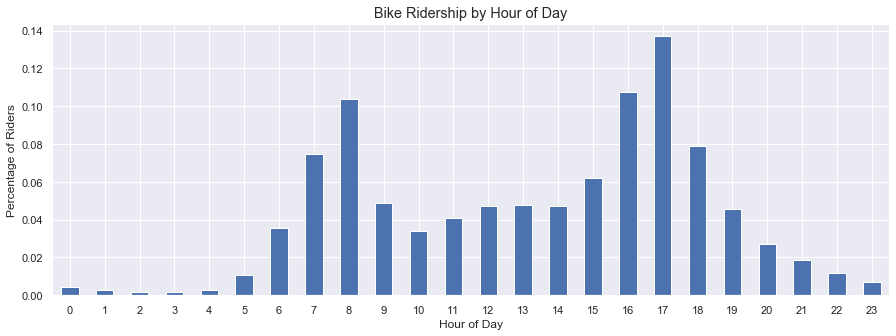

In [70]:
import matplotlib.pyplot as plt
sns.set()

fig, ax = plt.subplots(figsize=(15,5))
divvy['start_hour'].value_counts(normalize=True)\
                   .sort_index()\
                   .plot(kind='bar')

ax.set_title('Bike Ridership by Hour of Day', fontsize='large')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Percentage of Riders')
xlabels = divvy['start_hour'].unique().tolist()
plt.xticks(rotation='horizontal')

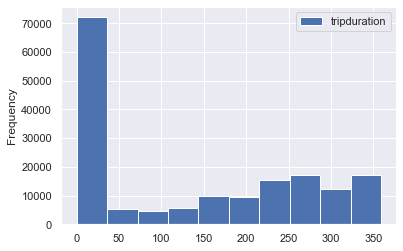

In [71]:
# of the trips less than 180 minutes (3 hours; remove outliers and maybe missing bikes), what does the distribution look like?
divvy[['tripduration']].query("tripduration <= 360").plot(kind='hist')

# End